# Diagrama Líquido-Vapor

# Etanol

Diagrama líquido-vapor de etanol en agua. Datos sacodos de [Wikipedia](https://en.wikipedia.org/wiki/Ethanol_(data_page)#Boiling_points_of_aqueous_solutions)

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
FOLDER = "diagrama_liquido_vapor"
DATA_PATH = os.path.join("data", "comp_etanol_temp.csv")

In [3]:
os.makedirs(FOLDER, exist_ok=True)

In [4]:
data = pd.read_csv(DATA_PATH, header=0)

In [5]:
def mass_2_mol(mass):
    mass_ethanol = mass
    mass_water = 100 - mass
    mol_ethanol = mass_ethanol / 46.07
    mol_water = mass_water / 18.01528
    total_mol = mol_ethanol + mol_water
    return mol_ethanol / total_mol

In [6]:
X_MIN, X_MAX = (0, 1)
T_MIN, T_MAX = (60, 100)

major_ticks_x = np.linspace(X_MIN, X_MAX, 5 + 1)
minor_ticks_x = np.linspace(X_MIN, X_MAX, 20 + 1)

major_ticks_y = np.linspace(T_MIN, T_MAX, 4 + 1)
minor_ticks_y = np.linspace(T_MIN, T_MAX, 16 + 1)

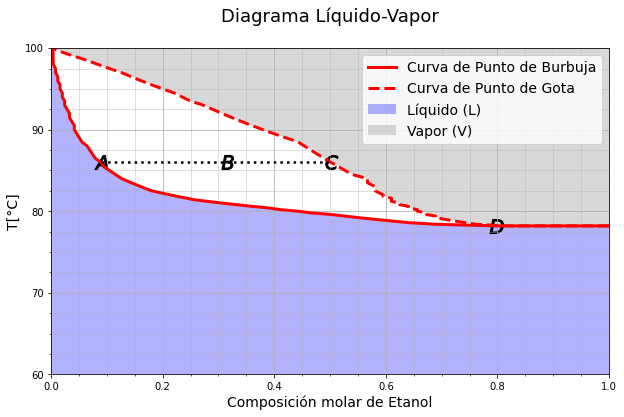

In [7]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

# Datos
x_curve = [1.0] + list(mass_2_mol(data["x"]))
y_curve = [1.0] + list(mass_2_mol(data["y"]))
t_curve = [data["T"][0]] + list(data["T"])

# Un punto de la mitad
mid = len(t_curve) // 2
frac_liq_vap = 0.45
t_mid = t_curve[mid]
x_mid = x_curve[mid]
y_mid = y_curve[mid]

# Curvas
ax.plot(x_curve, t_curve, 'r', linewidth=3, label="Curva de Punto de Burbuja")
ax.plot(y_curve, t_curve, '--r', linewidth=3, label="Curva de Punto de Gota")

# Áreas
ax.fill_between(x_curve, [T_MIN] * len(x_curve), t_curve, facecolor='b', alpha=0.3, label="Líquido (L)")
ax.fill_between(y_curve, t_curve, [T_MAX] * len(y_curve), facecolor='grey', alpha=0.3, label="Vapor (V)")

# Análisis
ax.scatter(x_mid, t_mid, marker='$A$', color='k', s=200)
ax.scatter(x_mid*frac_liq_vap + y_mid*(1-frac_liq_vap), t_mid, marker='$B$', color='k', s=200)
ax.scatter(y_mid, t_mid, marker='$C$', color='k', s=200)
ax.plot([x_mid, y_mid], [t_mid] * 2, ':k', linewidth=2.5)
ax.scatter(x_curve[1], t_curve[1], marker='$D$', color='k', s=200)

# Anotaciones
ax.set_xlabel("Composición molar de Etanol", fontsize=14)
ax.set_ylabel("T[°C]", fontsize=14)
ax.set_xlim((X_MIN, X_MAX))
ax.set_ylim((T_MIN, T_MAX))
ax.set_title("Diagrama Líquido-Vapor\n", fontsize=18)
ax.legend(fontsize=14)

# Aspecto
ax.set_xticks(major_ticks_x)
ax.set_xticks(minor_ticks_x, minor=True)
ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor=True)

ax.grid(which='both')
ax.grid(which='minor', b=True, alpha=0.5)
ax.grid(which='major', b=True, alpha=1.0)

fig.savefig(os.path.join(FOLDER, "etanol.png"))